In [1]:
import pandas as pd
from plotnine import *
from plotnine import options

In [2]:
data = pd.read_csv("output/output.csv")
data["SIZE"] = pd.Categorical(data["SIZE"], ["128 x 128", "256 x 256", "512 x 512", "1024 x 1024", "2048 x 2048", "4096 x 4096", "8192 x 8192"])
data.head()

,METHOD,SIZE,TIME
0,CUDA CORE,128 x 128,57722
1,CUTENSOR,128 x 128,20656
2,CUBLAS,128 x 128,605897
3,CUDA CORE,128 x 128,58091
4,CUTENSOR,128 x 128,21099


In [10]:
tmp = data.copy()

# select only the 8192 x 8192 data
tmp = tmp[tmp["SIZE"] == "8192 x 8192"]

# group by METHOD and SIZE, then calculate the mean of TIME
data_grouped = data.groupby(["METHOD", "SIZE"]).mean().reset_index()
data_grouped

CUDA CORE   6.268408e+07
CUBLAS      1.552121e+05
CUTENSOR    2.327038e+04

/tmp/ipykernel_200352/591143813.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,METHOD,SIZE,TIME
0,CUBLAS,128 x 128,1.535405e+05
1,CUBLAS,256 x 256,3.315296e+05
2,CUBLAS,512 x 512,1.491878e+05
3,CUBLAS,1024 x 1024,1.609414e+05
4,CUBLAS,2048 x 2048,1.472030e+05
5,CUBLAS,4096 x 4096,1.509727e+05
6,CUBLAS,8192 x 8192,1.552121e+05
7,CUDA CORE,128 x 128,5.625318e+04
8,CUDA CORE,256 x 256,2.238862e+05
9,CUDA CORE,512 x 512,8.273297e+05


In [11]:
# remove the size 8192 x 8192
# data = data[data["SIZE"] != "8192 x 8192"]

# convert TIME of nanoseconds to seconds
data["TIME"] = data["TIME"] / 1e9

/home/clsmfm/workspace/steep-toy/myenv/lib/python3.11/site-packages/plotnine/guides/guides.py:207: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


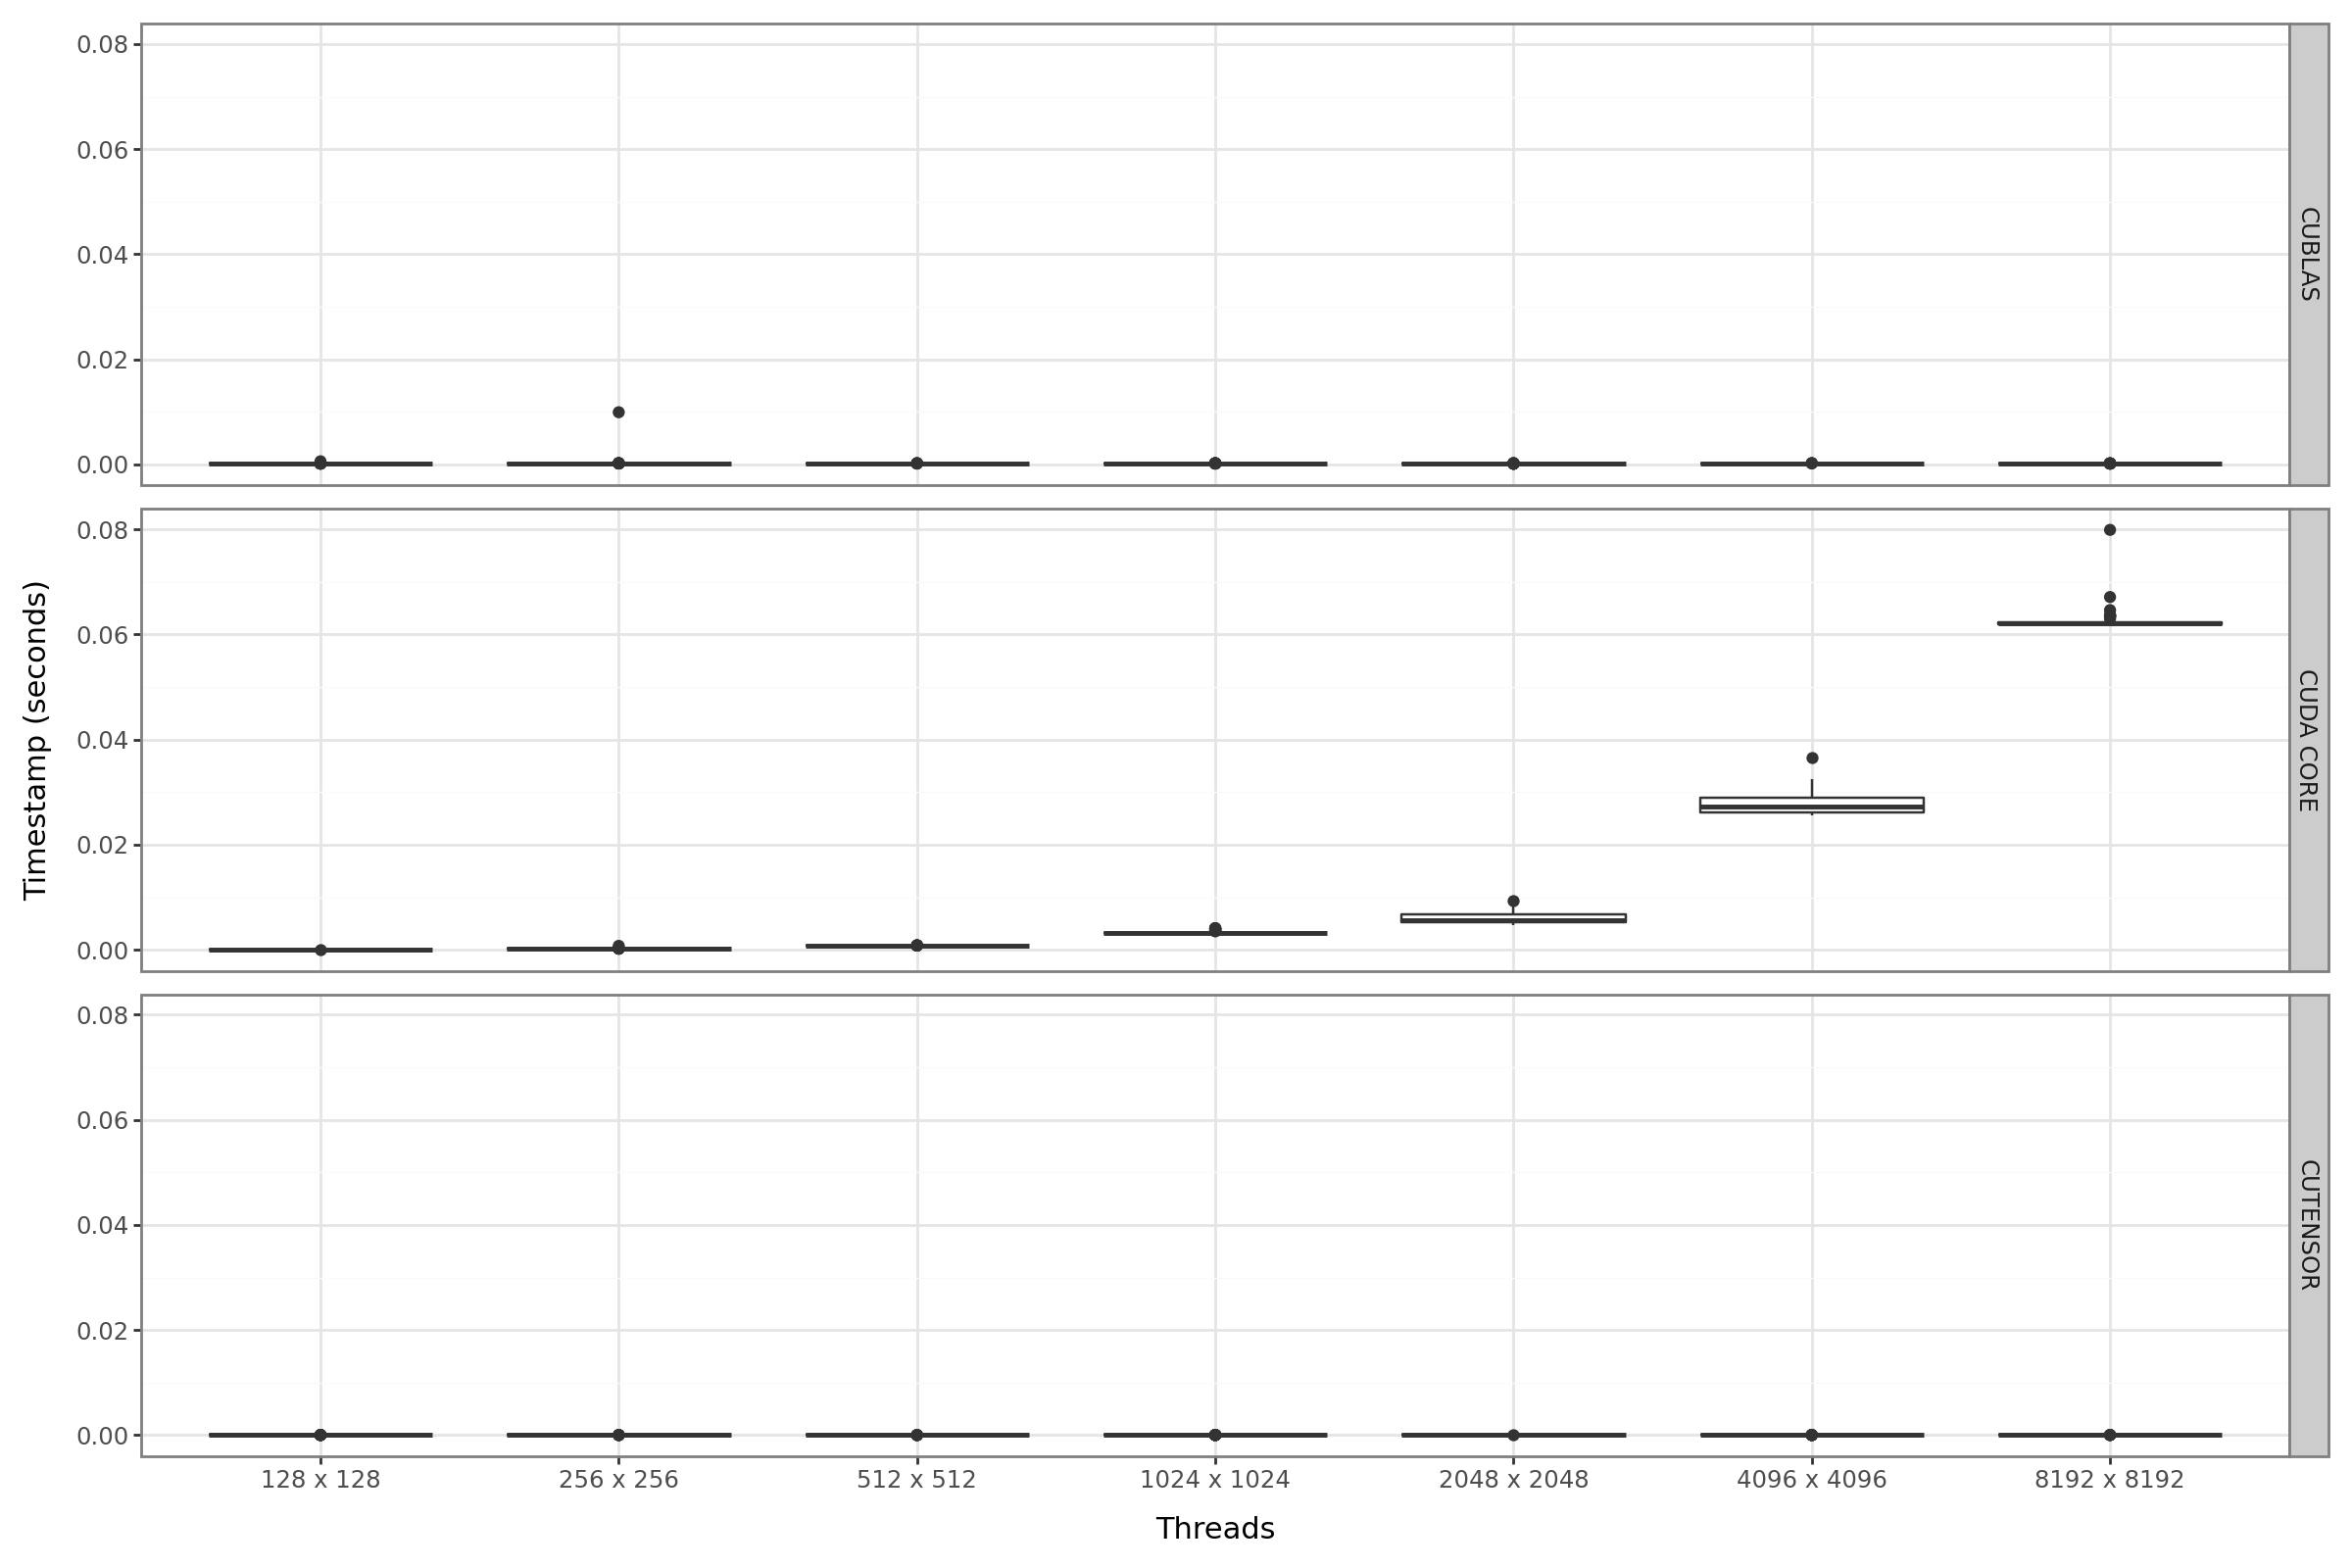

In [4]:
# Plot the TIME grouped by METHOD and SIZE

options.figure_size = (12, 8)
(ggplot(data, aes(x='SIZE', y='TIME'))
 + geom_boxplot()
 + facet_grid('METHOD~.')
 + scale_fill_hue()
 + labs(x="Threads", y="Timestamp (seconds)")
 + theme_bw())


/home/clsmfm/workspace/steep-toy/myenv/lib/python3.11/site-packages/plotnine/guides/guides.py:207: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


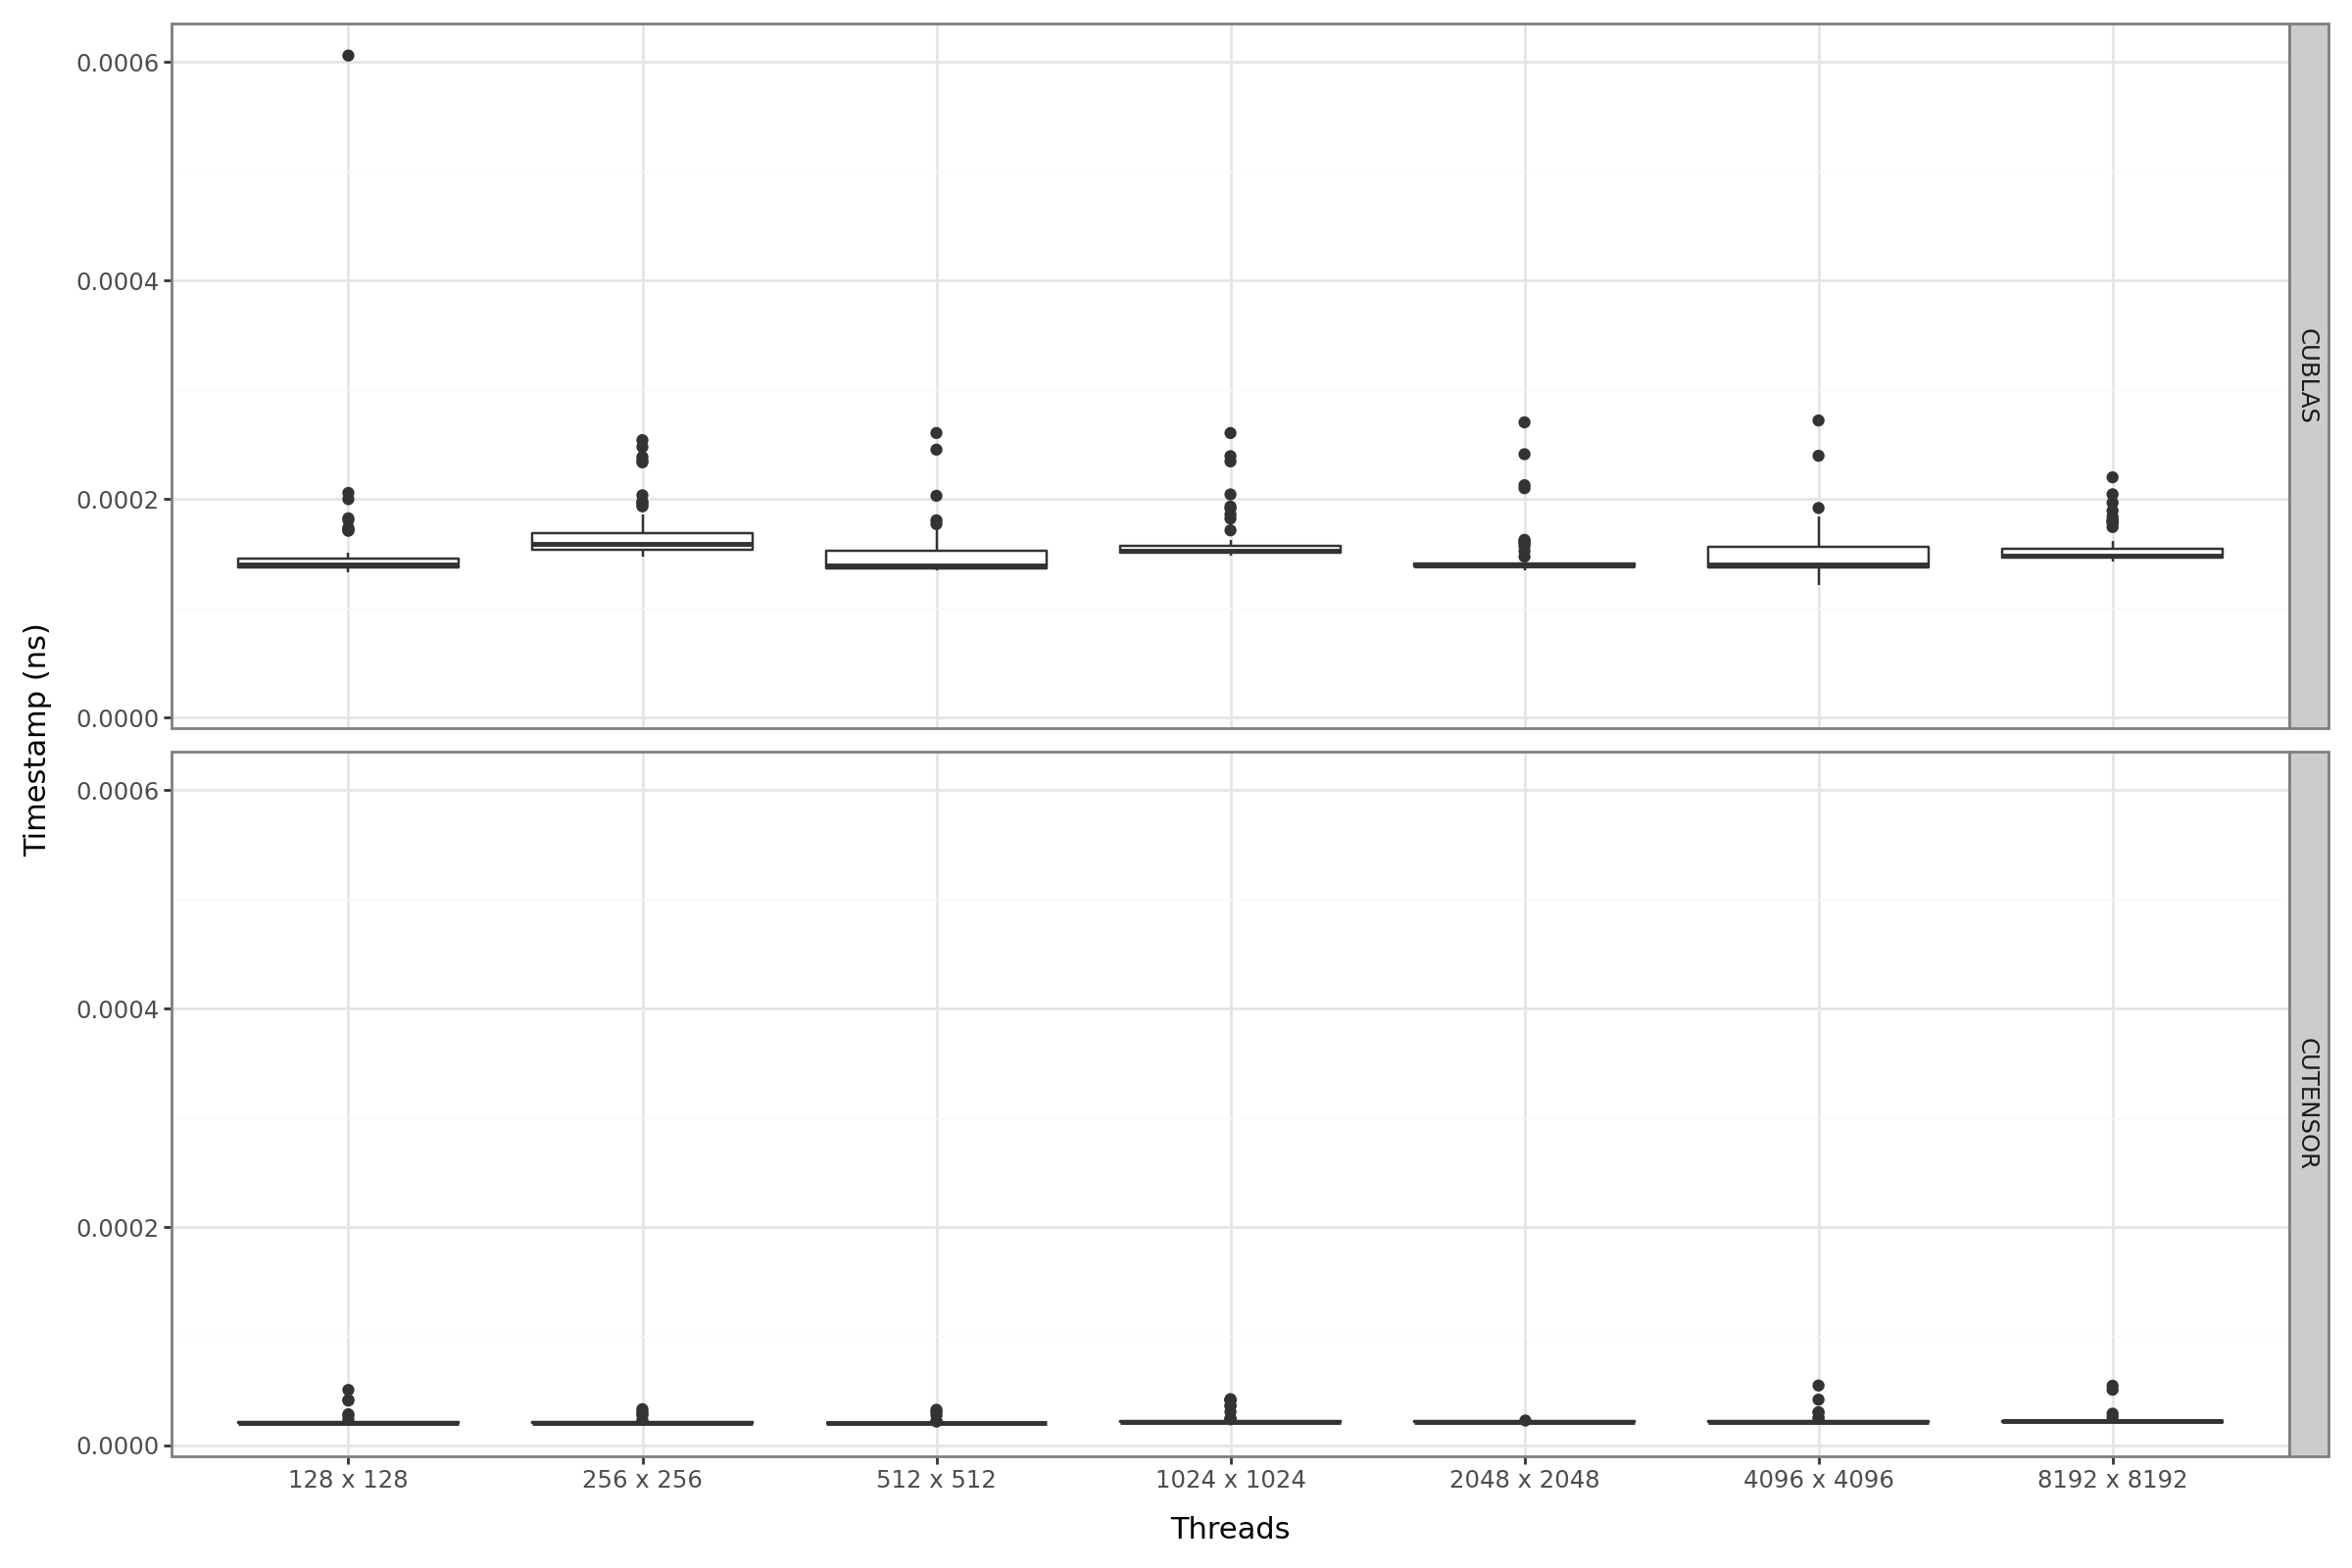

In [5]:
# Plot the TIME grouped by METHOD and SIZE without CUDA CORE and outliers
data = data[data["METHOD"] != "CUDA CORE"]

# remove the data points that are too small
data = data[data["TIME"] < 0.0075]

options.figure_size = (12, 8)
(ggplot(data, aes(x='SIZE', y='TIME'))
 + geom_boxplot()
 + facet_grid('METHOD~.')
 + scale_fill_hue()
 + labs(x="Threads", y="Timestamp (ns)")
 + theme_bw())
